# Balanced Random Forest Classifier

A random forest model combines many decision trees into a forest of trees. Random forest models:
- Are robust against overfitting because all of those weak learners are trained on different pieces of the data.
- Can be used to rank the importance of input variables in a natural way.
- Can handle thousands of input variables without variable deletion.
- Are robust to outliers and nonlinear data.
- Run efficiently on large datasets. 

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sqlalchemy import create_engine
# from config import db_password
from sqlalchemy import inspect
import matplotlib.pyplot as plt
import pandas as pd

business_df = pd.read_csv("../../../Data/business_census_merged_dataset.csv")


# Categorizing restaurants based on stars ratings
business_df["Category"] = pd.cut(business_df["Stars_Rating"],bins=[0.9,3.5,5],
                                 labels=["Lower Performance", "Higher Performance"])


def changeStatus(status):
    if status == "Lower Performance":
        return 0
    else:
        return 1
    
business_df['Category_Encoded'] = business_df["Category"].apply(changeStatus)
business_df["Category_Encoded"] = pd.to_numeric(business_df["Category_Encoded"])

# Transform Previous State column
def changeStatus(status):
    if status == 'AZ':
        return 1
    elif status == 'CA':
        return 2
    elif status == 'DE':
        return 3
    elif status == 'FL':
        return 4
    elif status == 'ID':
        return 5
    elif status == 'IL':
        return 6
    elif status == 'IN':
        return 7
    elif status == 'LA':
        return 8
    elif status == 'NJ':
        return 9
    elif status == 'NV':
        return 10
    elif status == 'PA':
        return 11
    else:
        return 12
# Along with replace() and map(), encode the state column into numbers.
business_df["State"] = business_df["State"].apply(changeStatus)

business_df["Median_Income(dollars)"] = pd.to_numeric(business_df["Median_Income(dollars)"], errors='coerce')
business_df["Mean_Income(dollars)"] = pd.to_numeric(business_df["Mean_Income(dollars)"], errors='coerce')

business_df = business_df.dropna(subset=['Median_Income(dollars)'])

In [11]:
business_df.columns

Index(['Restaurant_ID', 'Restaurants_Name', 'Address', 'City', 'State',
       'Postal_Code', 'Latitude', 'Longitude', 'Stars_Rating', 'Review_Count',
       'Restaurants_Delivery', 'Outdoor_Seating', 'Accepts_CreditCards',
       'Price_Range', 'Alcohol', 'Good_For_Kids', 'Reservations',
       'Restaurants_TakeOut', 'WiFi', 'Good_For_Groups',
       'Wheelchair_Accessible', 'Happy_Hour', 'Noise_Level',
       'Dietary_Restrictions', 'Total_Estimate_Households_per_Zip',
       'Total_Estimate_Married-couple_Family_households',
       'Total_Estimate_Nonfamily_households', 'Median_Income(dollars)',
       'Mean_Income(dollars)', 'Category', 'Category_Encoded'],
      dtype='object')

In [13]:
# Define features set
X = business_df[['State','Review_Count', 'Restaurants_Delivery', 'Outdoor_Seating',
       'Accepts_CreditCards', 'Price_Range', 'Alcohol', 'Good_For_Kids',
       'Reservations', 'Restaurants_TakeOut', 'WiFi', 'Good_For_Groups',
       'Wheelchair_Accessible', 'Happy_Hour', 'Noise_Level',
       'Dietary_Restrictions',
                'Total_Estimate_Married-couple_Family_households',
       'Total_Estimate_Nonfamily_households',
                'Median_Income(dollars)', 'Total_Estimate_Households_per_Zip']]

In [14]:
# Define the target
y = business_df["Category_Encoded"]
y

0        1
1        1
2        1
3        0
4        1
        ..
24734    1
24735    1
24736    0
24737    0
24738    0
Name: Category_Encoded, Length: 24739, dtype: int64

In [15]:
# Split the model into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                   random_state=1, 
                                                    stratify=y)

In [16]:
# Resample the training data with the BalancedRandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

model.fit(X_train, y_train)  

BalancedRandomForestClassifier(random_state=1)

In [17]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6520265354189092

In [18]:
# Training balanced accuracy
y_pred_train = model.predict(X_train)
balanced_accuracy_score(y_train, y_pred_train)

0.9994714966059557

In [19]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[2000,  986],
       [1170, 2029]])

In [20]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.63      0.67      0.63      0.65      0.65      0.43      2986
          1       0.67      0.63      0.67      0.65      0.65      0.42      3199

avg / total       0.65      0.65      0.65      0.65      0.65      0.42      6185



In [21]:
# List the features sorted in descending order by feature importance
feature_importance = sorted(zip(model.feature_importances_, X.columns), reverse=True)

for i in feature_importance:
    print('{} : ({})'.format(i[1], i[0]))

Review_Count : (0.22643557596851938)
Median_Income(dollars) : (0.10447599773531253)
Total_Estimate_Married-couple_Family_households : (0.10336934258148994)
Total_Estimate_Nonfamily_households : (0.10270381227260895)
Total_Estimate_Households_per_Zip : (0.09997552369582124)
State : (0.05769603092835557)
Noise_Level : (0.0435140149234881)
Wheelchair_Accessible : (0.037371101922562704)
Price_Range : (0.032822868446919604)
WiFi : (0.026887616303672812)
Restaurants_Delivery : (0.02625419049218679)
Reservations : (0.025267098794591512)
Outdoor_Seating : (0.023101907764094005)
Happy_Hour : (0.021264305276072266)
Good_For_Kids : (0.019702838651152237)
Good_For_Groups : (0.01911035849912466)
Accepts_CreditCards : (0.012428595192659566)
Alcohol : (0.008771453605377922)
Restaurants_TakeOut : (0.008688349547429733)
Dietary_Restrictions : (0.00015901739856053238)


In [51]:
df = pd.DataFrame(feature_importance, columns=[["Score", "Feature"]])

In [53]:
df

,Score,Feature
0,0.226436,Review_Count
1,0.104476,Median_Income(dollars)
2,0.103369,Total_Estimate_Married-couple_Family_households
3,0.102704,Total_Estimate_Nonfamily_households
4,0.099976,Total_Estimate_Households_per_Zip
5,0.057696,State
6,0.043514,Noise_Level
7,0.037371,Wheelchair_Accessible
8,0.032823,Price_Range
9,0.026888,WiFi


In [34]:
score = df["Score"]
feature = df["Feature"]

In [59]:
feature = df["Feature"].values.tolist()
feature

[['Review_Count'],
 ['Median_Income(dollars)'],
 ['Total_Estimate_Married-couple_Family_households'],
 ['Total_Estimate_Nonfamily_households'],
 ['Total_Estimate_Households_per_Zip'],
 ['State'],
 ['Noise_Level'],
 ['Wheelchair_Accessible'],
 ['Price_Range'],
 ['WiFi'],
 ['Restaurants_Delivery'],
 ['Reservations'],
 ['Outdoor_Seating'],
 ['Happy_Hour'],
 ['Good_For_Kids'],
 ['Good_For_Groups'],
 ['Accepts_CreditCards'],
 ['Alcohol'],
 ['Restaurants_TakeOut'],
 ['Dietary_Restrictions']]

In [64]:
feature = ['Review_Count',
 'Median_Income(dollars)',
 'Total_Estimate_Married-couple_Family_households',
 'Total_Estimate_Nonfamily_households',
 'Total_Estimate_Households_per_Zip',
 'State',
 'Noise_Level',
 'Wheelchair_Accessible',
 'Price_Range',
 'WiFi',
 'Restaurants_Delivery',
 'Reservations',
 'Outdoor_Seating',
 'Happy_Hour',
 'Good_For_Kids',
 'Good_For_Groups',
 'Accepts_CreditCards',
 'Alcohol',
 'Restaurants_TakeOut',
 'Dietary_Restrictions']

In [61]:
score = df["Score"].values.tolist()
score

[[0.22643557596851938],
 [0.10447599773531253],
 [0.10336934258148994],
 [0.10270381227260895],
 [0.09997552369582124],
 [0.05769603092835557],
 [0.0435140149234881],
 [0.037371101922562704],
 [0.032822868446919604],
 [0.026887616303672812],
 [0.02625419049218679],
 [0.025267098794591512],
 [0.023101907764094005],
 [0.021264305276072266],
 [0.019702838651152237],
 [0.01911035849912466],
 [0.012428595192659566],
 [0.008771453605377922],
 [0.008688349547429733],
 [0.00015901739856053238]]

In [65]:
score = [0.22643557596851938,
 0.10447599773531253,
 0.10336934258148994,
 0.10270381227260895,
 0.09997552369582124,
 0.05769603092835557,
 0.0435140149234881,
 0.037371101922562704,
 0.032822868446919604,
 0.026887616303672812,
 0.02625419049218679,
 0.025267098794591512,
 0.023101907764094005,
 0.021264305276072266,
 0.019702838651152237,
 0.01911035849912466,
 0.012428595192659566,
 0.008771453605377922,
 0.008688349547429733,
 0.00015901739856053238]

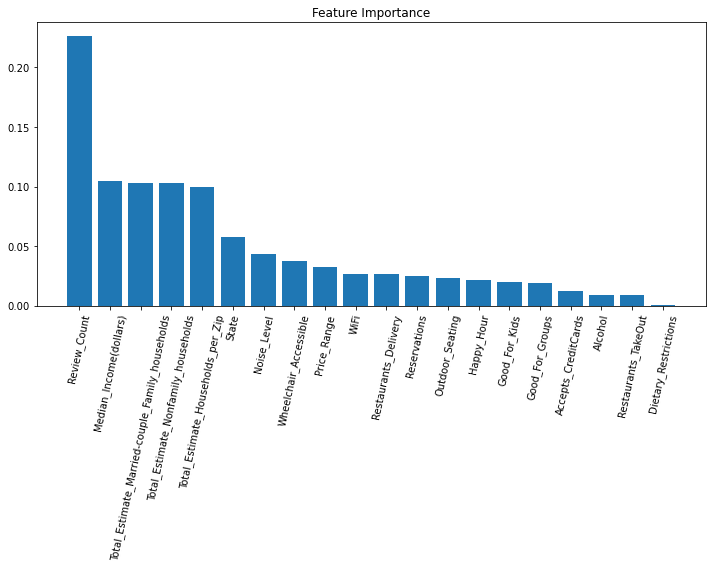

In [81]:
plt.rcParams["figure.figsize"] = (10,8)
plt.bar(feature, score)
plt.xticks(feature, rotation=78)
plt.title("Feature Importance")

plt.tight_layout()

In [46]:
df.dtypes

Score      float64
Feature     object
dtype: object

<AxesSubplot:>

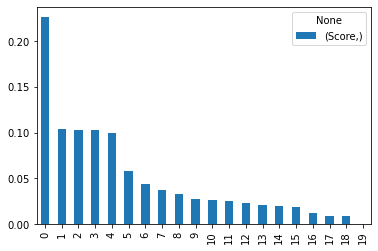

In [45]:
df.plot(kind="bar")